In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Reading the DOB csv file as dataframe
permitData = pd.read_csv('DOB_Permit_Issuance.csv')
violationData = pd.read_csv('DOB_ECB_Violations.csv')
appFillData = pd.read_csv('DOB_Job_Application_Filings.csv')

In [3]:
violationData = violationData[violationData['ISSUE_DATE'] != 0]
violationData['Violation']=1

# Filtering the data with date

In [4]:
violationData['ISSUE_DATE'] =  pd.to_datetime(violationData['ISSUE_DATE'], format='%Y%m%d')
violationData['ISSUE_DATE'] =  pd.to_datetime(violationData['ISSUE_DATE'], format='%m/%d/%Y')
permitData['Issuance Date'] =  pd.to_datetime(permitData['Issuance Date'],
                                                   format='%m/%d/%Y %H:%M:%S %p' )
permitData['Issuance Date'] =  pd.to_datetime(permitData['Issuance Date'], format='%m/%d/%Y')
permitData['Expiration Date'] =  pd.to_datetime(permitData['Expiration Date'], 
                                                     format='%m/%d/%Y %H:%M:%S %p')
permitData['Expiration Date'] =  pd.to_datetime(permitData['Expiration Date'], format='%m/%d/%Y')
appFillData['Assigned'] =  pd.to_datetime(appFillData['Assigned'], format='%m/%d/%Y')
violationData_2016_19 = violationData[(violationData['ISSUE_DATE'] > '12/31/2017')]
appFillData_2016_19 = appFillData[appFillData['Assigned']> '12/31/2017']
permitData_2016_19 = permitData[permitData['Issuance Date'] > '12/31/2017']

In [5]:
newColumns=['Job #','BOROUGH', 'Bin #', 'Job doc. #',
       'Job Type', 'Self_Cert', 'Community Board', 'Bldg Type', 'Residential','Work Type', 'Permit Status', 'Permit Type',
       'Permit Sequence #', 'Permit Subtype', 'Oil Gas', "Permittee's License Type", 'Act as Superintendent',
        'HIC License',"Owner's Business Type", 'Non-Profit','LATITUDE','LONGITUDE','COUNCIL_DISTRICT','Issuance Date']
permitData_2016_19 = permitData_2016_19[newColumns]
newColumns= ['ECB_VIOLATION_STATUS','BIN', 'SEVERITY','VIOLATION_TYPE','AGGRAVATED_LEVEL','Violation']
violationData_2016_19 = violationData_2016_19[newColumns]
newColumns=['Bin #', 'Cluster','Landmarked', 'Adult Estab', 'Loft Board', 'City Owned', 'Little e',
        'Plumbing', 'Mechanical', 'Boiler', 'Fuel Burning', 'Fuel Storage', 'Standpipe', 'Sprinkler', 'Fire Alarm',
       'Equipment', 'Fire Suppression', 'Curb Cut', 'Other',       
        'Professional Cert', 'Initial Cost','Total Est. Fee', 'Fee Status', 'Existing Zoning Sqft',
       'Proposed Zoning Sqft', 'Horizontal Enlrgmt', 'Vertical Enlrgmt',
       'Enlargement SQ Footage', 'Street Frontage', 'ExistingNo. of Stories',
       'Proposed No. of Stories', 'Existing Height', 'Proposed Height',
       'Existing Dwelling Units', 'Proposed Dwelling Units',
       'Existing Occupancy', 'Proposed Occupancy', 'Site Fill',  'Owner Type', 'TOTAL_CONSTRUCTION_FLOOR_AREA', 
            'WITHDRAWAL_FLAG', 'JOB_NO_GOOD_COUNT']
appFillData_2016_19 = appFillData_2016_19[newColumns]

In [6]:
appFillData_2016_19.rename(columns = {'Bin #':'BIN'}, inplace = True)
permitData_2016_19.rename(columns = {'Bin #':'BIN'}, inplace = True)

# Merging the data

In [7]:
permitAndviolationdata = pd.merge(permitData_2016_19,appFillData_2016_19, on =['BIN'], how='outer')
permitAndviolationdata.shape

(1007034, 65)

In [8]:
data = pd.merge(permitAndviolationdata,violationData_2016_19, on =['BIN'], how='outer')
data.shape

(4064739, 70)

# Exploratory Data Analysis

In [9]:
data['BOROUGH'] = data['BOROUGH'].map({'MANHATTAN': 1, 'BRONX':2,
                                                        'BROOKLYN':3, 'QUEENS':4, 'STATEN ISLAND':5})
data['Violation'] = data['Violation'].fillna(0).astype(int)

In [10]:
data['BOROUGH'] = data['BOROUGH'].fillna(0).astype(int)

In [11]:
data['BOROUGH'].unique()

array([1, 2, 3, 4, 5, 0], dtype=int64)

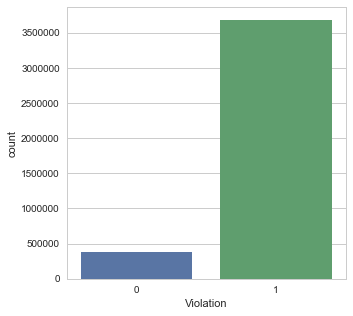

In [12]:
import seaborn as sns
plt.figure(figsize = (5,5))
sns.set(style = 'whitegrid')
sns.countplot(x='Violation', data=data)
plt.show()

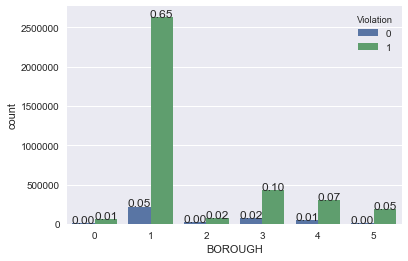

In [13]:
from matplotlib.pyplot import show
import seaborn as sns
sns.set(style="darkgrid")
total = float(len(data)) # one person per row 
#ax = sns.barplot(x="class", hue="who", data=titanic)
ax = sns.countplot(x="BOROUGH", hue="Violation", data=data) # for Seaborn version 0.7 and more
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/total),
            ha="center") 
plt.show()

In [14]:
data.groupby(["BOROUGH","Violation"]).size().reset_index(name='count')

,BOROUGH,Violation,count
0,0,0,13583
1,0,1,55824
2,1,0,219950
3,1,1,2636611
4,2,0,16729
5,2,1,68579
6,3,0,71560
7,3,1,424613
8,4,0,49300
9,4,1,304305


In [15]:
def plotCountPlot(x,y):    
    sns.set(style="darkgrid")
    total = float(len(data)) # one person per row 
    #ax = sns.barplot(x="class", hue="who", data=titanic)
    ax = sns.countplot(x=x, hue=y, data=data) # for Seaborn version 0.7 and more
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/total),
            ha="center") 
    plt.show()

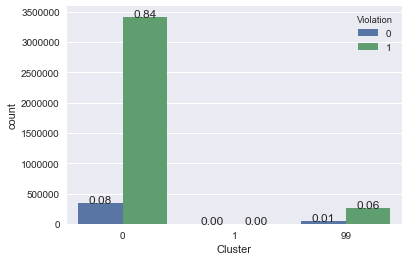

In [16]:
data['Cluster'] = data['Cluster'].map({ 'N':0, 'Y':1,'D':2,'P':3})
data['Cluster'] = data['Cluster'].fillna(99).astype(int)
plotCountPlot("Cluster","Violation")

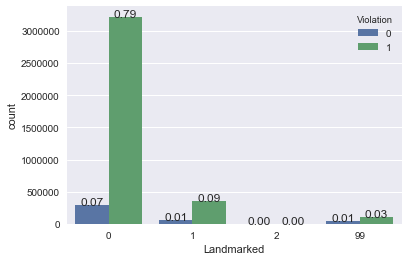

In [17]:
data['Landmarked'] = data['Landmarked'].map({ 'N':0, 'Y':1,'L':2,'C':3})
data['Landmarked'] = data['Landmarked'].fillna(99).astype(int)
plotCountPlot("Landmarked","Violation")

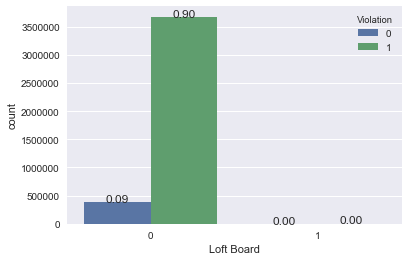

In [18]:
data['Loft Board'] = data['Loft Board'].map({ 'N':0, 'Y':1})
data['Loft Board'] = data['Loft Board'].fillna(0).astype(int)
plotCountPlot("Loft Board","Violation")

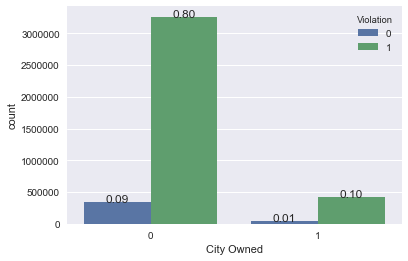

In [19]:
data['City Owned'] = data['City Owned'].map({ 'N':0, 'Y':1,'I':2,'M':3})
data['City Owned'] = data['City Owned'].fillna(0).astype(int)
plotCountPlot("City Owned","Violation")

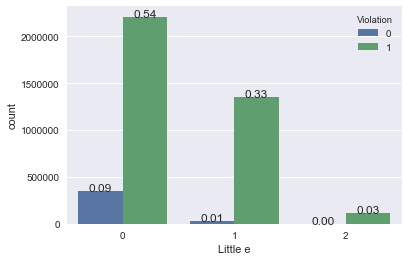

In [20]:
data['Little e'] = data['Little e'].map({ 'N':0, 'Y':1,'H':2,'M':3,'X':4})
data['Little e'] = data['Little e'].fillna(0).astype(int)
plotCountPlot("Little e","Violation")

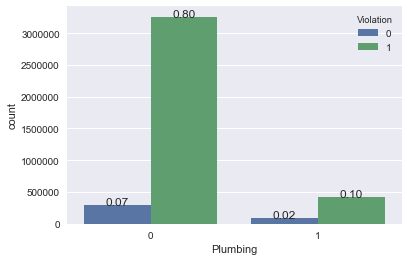

In [21]:
data['Plumbing'] = data['Plumbing'].map({ 'N':0, 'X':1})
data['Plumbing'] = data['Plumbing'].fillna(0).astype(int)
plotCountPlot("Plumbing","Violation")

In [22]:
data.groupby(["Plumbing","Violation"]).size().reset_index(name='count')

,Plumbing,Violation,count
0,0,0,294260
1,0,1,3259049
2,1,0,89157
3,1,1,422273


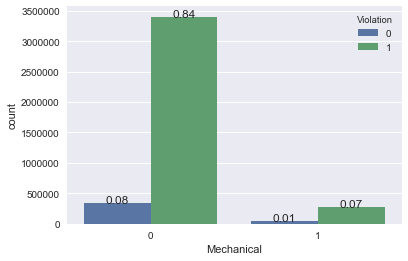

In [23]:
data['Mechanical'] = data['Mechanical'].map({ 'N':0, 'X':1})
data['Mechanical'] = data['Mechanical'].fillna(0).astype(int)
plotCountPlot("Mechanical","Violation")

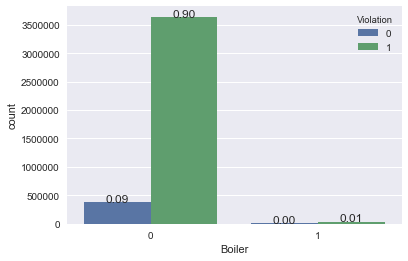

In [24]:
data['Boiler'] = data['Boiler'].map({ 'N':0, 'X':1})
data['Boiler'] = data['Boiler'].fillna(0).astype(int)
plotCountPlot("Boiler","Violation")

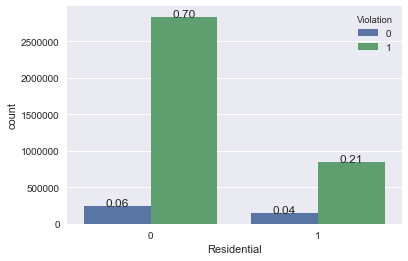

In [25]:
data['Residential']=data['Residential'].map({ 'NO':0, 'YES':1})
data['Residential']=data['Residential'].fillna(0).astype(int)
plotCountPlot("Residential","Violation")

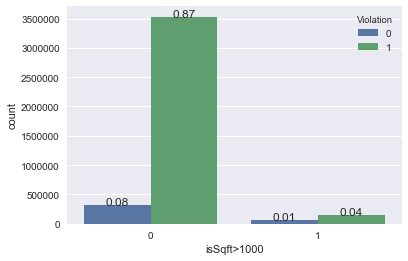

In [26]:
data['Existing Zoning Sqft'] = data['Existing Zoning Sqft'].fillna(9999999).astype(int)
data['Proposed Zoning Sqft'] = data['Proposed Zoning Sqft'].fillna(9999999).astype(int)
data['isSqft>1000'] = ((data['Existing Zoning Sqft'] > 1000) & (data['Proposed Zoning Sqft'] > 1000)).astype(int)
plotCountPlot("isSqft>1000","Violation")

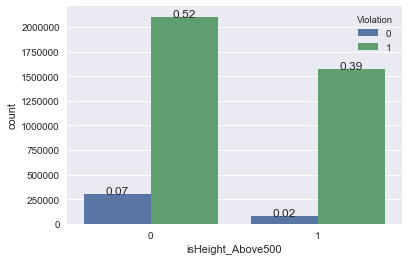

In [27]:
data['Existing Height'] = data['Existing Height'].fillna(9999999)
data['Proposed Height'] = data['Proposed Height'].fillna(9999999)
data['isHeight_Above500'] = ((data['Existing Height'] >= 500) & (data['Proposed Height'] >= 500) ).astype(int)
plotCountPlot("isHeight_Above500","Violation")

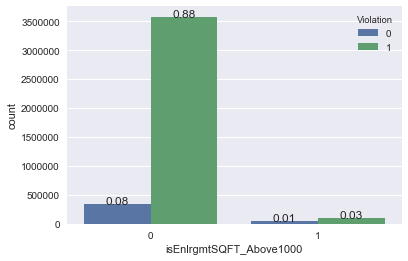

In [28]:
data['Street Frontage'] = data['Street Frontage'].fillna(9999999)
data['isEnlrgmtSQFT_Above1000'] = (data['Street Frontage'] >= 1000).astype(int)
plotCountPlot("isEnlrgmtSQFT_Above1000","Violation")

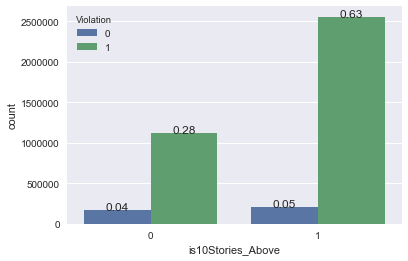

In [29]:
data['ExistingNo. of Stories'] = data['ExistingNo. of Stories'].fillna(9999999).astype(int)
data['Proposed No. of Stories'] = data['Proposed No. of Stories'].fillna(9999999).astype(int)
data['is10Stories_Above'] = ((data['Proposed No. of Stories'] >= 10) & (data['ExistingNo. of Stories'] >= 10) ).astype(int)
plotCountPlot("is10Stories_Above","Violation")

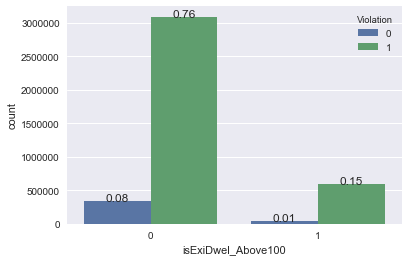

In [30]:
data['Existing Dwelling Units']=data['Existing Dwelling Units'].fillna(0).astype(int)
data['Proposed Dwelling Units']=data['Proposed Dwelling Units'].fillna(0).astype(int)
data['isExiDwel_Above100'] = ((data['Existing Dwelling Units'] >= 100) & 
                              (data['Proposed Dwelling Units'] >= 100) ).astype(int)
plotCountPlot("isExiDwel_Above100","Violation")

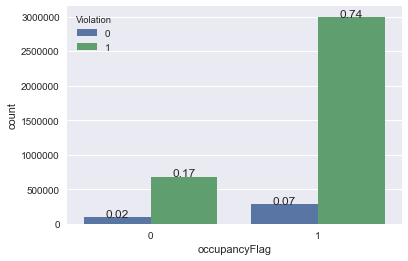

In [31]:
data['occupancyFlag'] = (data['Existing Occupancy']==data['Proposed Occupancy']).astype(int)
plotCountPlot("occupancyFlag","Violation")

In [32]:
data['Owner Type'] = data['Owner Type'].map({ 'PARTNERSHIP':0, 'CORPORATION':1, 'INDIVIDUAL':2,
                                                                     'CONDO/CO-OP':3, "OTHER GOV'T AGENCY":4, 'NYC AGENCY':5,
                                                                     'NYCHA/HHC':6, 'NY STATE':7, 'HPD':8,'NYCHA':9,
                                                                     'HHC':10, 'OTHER':11, 'DCAS':12, 'DOE':13})
data['Owner Type'] = data['Owner Type'].fillna(99).astype(int)

data.groupby(["Owner Type","Violation"]).size()
data.groupby(["Owner Type","Violation"]).size().reset_index(name='count')

,Owner Type,Violation,count
0,0,0,96300
1,0,1,1090140
2,1,0,149364
3,1,1,2119107
4,2,0,46227
5,2,1,108804
6,3,0,28987
7,3,1,168434
8,4,0,13794
9,4,1,54992


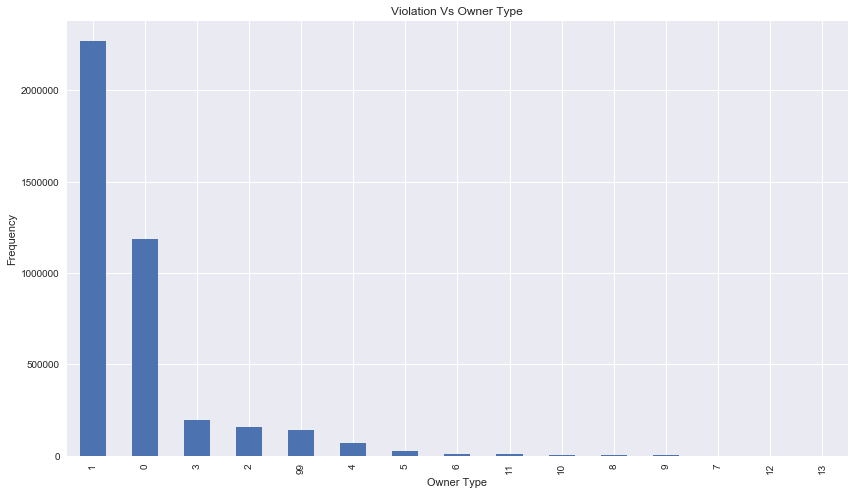

In [33]:
ax = data['Owner Type'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Violation Vs Owner Type")
ax.set_xlabel("Owner Type")
ax.set_ylabel("Frequency")
plt.show()

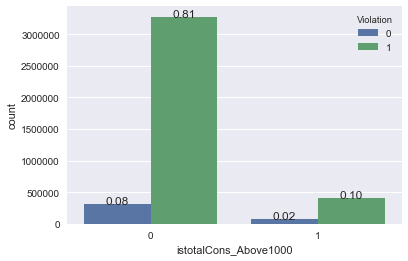

In [34]:
data['TOTAL_CONSTRUCTION_FLOOR_AREA'] = data['TOTAL_CONSTRUCTION_FLOOR_AREA'].fillna(9999999)
data['istotalCons_Above1000'] = (data['TOTAL_CONSTRUCTION_FLOOR_AREA'] >= 1000).astype(int)
plotCountPlot("istotalCons_Above1000","Violation")

In [35]:
data['WITHDRAWAL_FLAG'] = data['WITHDRAWAL_FLAG'].fillna(9999999).astype(int)
#plotCountPlot("WITHDRAWAL_FLAG","Violation")
data.groupby(["WITHDRAWAL_FLAG","Violation"]).size()

WITHDRAWAL_FLAG  Violation
0                0             341003
                 1            3566195
1                0               2080
                 1              10813
2                0                324
                 1               3061
3                0                 49
                 1                 68
6                1                209
9999999          0              39961
                 1             100976
dtype: int64

In [36]:
data['JOB_NO_GOOD_COUNT'].unique()
data['JOB_NO_GOOD_COUNT'] = data['JOB_NO_GOOD_COUNT'].fillna(0).astype(int)

In [37]:
plt.clf()

In [38]:
# riskdf.hist (bins=50, figsize=(20,15), color = 'deepskyblue')
# plt.show()

# Model Creation

In [39]:
## Imbalance Data Check
nonviolatedApp =(data[data.Violation == 0]['Violation']).count()
violatedApp =(data[data.Violation == 1]['Violation']).count()
print("Total Applications",data.shape[0])
print("Non violated Applications %",nonviolatedApp/data.shape[0] )
print("Violated Applications %",violatedApp/data.shape[0] )


Total Applications 4064739
Non violated Applications % 0.0943275816725256
Violated Applications % 0.9056724183274744


# Subsetting the important features

In [40]:
newColumns=['BOROUGH','Landmarked','City Owned','Little e','Plumbing','Mechanical','Boiler','Residential',
'isSqft>1000','isHeight_Above500','isEnlrgmtSQFT_Above1000','is10Stories_Above',
"isExiDwel_Above100","occupancyFlag","Owner Type", "istotalCons_Above1000","WITHDRAWAL_FLAG","JOB_NO_GOOD_COUNT",'Violation']

In [41]:
sampleData = data[data['Issuance Date'] > '01/31/2019']

In [42]:
newData = sampleData[newColumns]

In [43]:
newData.shape

(418749, 19)

In [44]:
newData.isnull().sum()

BOROUGH                    0
Landmarked                 0
City Owned                 0
Little e                   0
Plumbing                   0
Mechanical                 0
Boiler                     0
Residential                0
isSqft>1000                0
isHeight_Above500          0
isEnlrgmtSQFT_Above1000    0
is10Stories_Above          0
isExiDwel_Above100         0
occupancyFlag              0
Owner Type                 0
istotalCons_Above1000      0
WITHDRAWAL_FLAG            0
JOB_NO_GOOD_COUNT          0
Violation                  0
dtype: int64

In [45]:
#newData['BIN'] = newData[newData['BIN'] != 'C855835']

In [46]:
# ['BIN', 'BOROUGH', 'Landmarked', 'City Owned', 'Little e', 'Plumbing',
#        'Mechanical', 'Boiler', 'Residential', 'isSqft>1000',
#        'isHeight_Above500', 'isEnlrgmtSQFT_Above1000', 'is10Stories_Above',
#        'isExiDwel_Above100', 'occupancyFlag', 'Owner Type',
#        'istotalCons_Above1000', 'WITHDRAWAL_FLAG', 'JOB_NO_GOOD_COUNT',
#        'OT_OF'],
newData['OT_OF'] = newData['Owner Type']*newData['occupancyFlag']
newData['Plumbing_Mechanical'] = newData['Plumbing']*newData['Mechanical']
newData['Mechanical_Boiler'] = newData['Mechanical']*newData['Boiler']
newData['isSqft>1000_isHeight_Above500'] = newData['isSqft>1000']*newData['isHeight_Above500']

In [47]:
newData.dropna(axis = 'rows', inplace = True)
newData.shape

(418749, 23)

In [48]:
# newData = pd.concat([newData.drop('BOROUGH', axis=1), pd.get_dummies(newData['BOROUGH'],prefix='BOROUGH')], axis=1)
# try:
#     newData.drop('BOROUGH_0', axis=1)
# except:
#     print()
# newData.shape

In [49]:
newData.shape

(418749, 23)

In [50]:
y = newData['Violation']
newData.drop(['Violation'], axis =1 ,inplace = True)
X = newData

In [51]:
from sklearn.model_selection import train_test_split
X_train_org,X_test_org,y_train,y_test = train_test_split(X, y, random_state = 0,stratify=y)

In [52]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

# LinearRegression Classification

In [88]:
from sklearn.linear_model import LinearRegression
lreg = LinearRegression()
lreg.fit(X_train, y_train)
print('Train score: %.4f'%lreg.score(X_train, y_train))
print('Test score: %.4f'%lreg.score(X_test, y_test))

Train score: 0.0860
Test score: 0.0864


In [89]:
i= 0
for x in X.columns:
    print(x +" : "+ '%.5f'%lreg.coef_[i])
    i= i+1

BOROUGH : 0.00003
Landmarked : -0.00359
City Owned : 0.01169
Little e : 0.02986
Plumbing : -0.02845
Mechanical : -0.00334
Boiler : 0.00482
Residential : -0.00549
isSqft>1000 : -0.03898
isHeight_Above500 : 0.02740
isEnlrgmtSQFT_Above1000 : 0.00642
is10Stories_Above : 0.03775
isExiDwel_Above100 : 0.03573
occupancyFlag : -0.04893
Owner Type : -0.10864
istotalCons_Above1000 : -0.00345
WITHDRAWAL_FLAG : 0.06476
JOB_NO_GOOD_COUNT : -0.00442
OT_OF : -0.01373
Plumbing_Mechanical : 0.00990
Mechanical_Boiler : 0.00608
isSqft>1000_isHeight_Above500 : 0.00418


In [ ]:
# from sklearn.neighbors import KNeighborsClassifier
# knn = KNeighborsClassifier(3)
# knn.fit(X_train, y_train)


In [ ]:
# print(knn.score(X_train, y_train))
# print(knn.score(X_test, y_test))

# Decision Tree Classification

In [90]:
## Decision Tree Classifier without hyper parameter tuning
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(random_state=0)
dtree.fit(X_train, y_train)
print("Accuracy Score train:{:.3f}".format(dtree.score(X_train, y_train)))
print("Accuracy Score train:{:.3f}".format(dtree.score(X_test, y_test)))  

Accuracy Score train:0.897
Accuracy Score train:0.894


# LinearSVC Classification

In [91]:
## Linear SVC without hyper - parameter tuning
from sklearn.svm import LinearSVC
linear_svm = LinearSVC().fit(X_train, y_train)
print("Accuracy Score train:", linear_svm.score(X_train, y_train))
print("Accuracy Score test:", linear_svm.score(X_test, y_test))

Accuracy Score train: 0.8755751271249853
Accuracy Score test: 0.8755540272046461


## SVC without hyperparameter tuning

In [ ]:

from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)
print("Accuracy Score train:",svc.score(X_train, y_train))
print("Accuracy Score test:",svc.score(X_test, y_test))

# RandomForest Classifier

In [54]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state = 0)
rf.fit(X_train,y_train)
print("Accuracy Score train:",rf.score(X_train, y_train))
print("Accuracy Score train:",rf.score(X_test, y_test))

Accuracy Score train: 0.8967939349362066
Accuracy Score train: 0.8941712517193948


In [ ]:
## SVC - linear with hyperparameter tuning using gridsearch
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
print("Parameter grid:\n{}".format(param_grid))
scv_grid = GridSearchCV(SVC(kernel='linear'), param_grid, cv=5, return_train_score=True)
scv_grid.fit(X_train, y_train)
print("Best parameters: {}".format(scv_grid.best_params_))
print("Best cross-validation score: {:.2f}".format(scv_grid.best_score_))
print("Accuracy Score train:",scv_grid.score(X_train, y_train))

Parameter grid:
{'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
